# **Exploratory Data Analysis Project**
## Name: Anubhav Pawan
## Reg No: 22BDS0316


### ***Phase-1***

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# 1.1 Load the dataset

url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/lithium-ion%20batteries.csv"
df = pd.read_csv(url)

In [6]:
# 1.2 Basic Exploration

print("\nDataset Dimensions:")
print(df.shape)

print("\nData Types and Info:")
print(df.info())

print("\nFirst 5 Rows:")
print(df.head())


Dataset Dimensions:
(339, 11)

Data Types and Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Materials Id           339 non-null    object 
 1   Formula                338 non-null    object 
 2   Spacegroup             339 non-null    object 
 3   Formation Energy (eV)  339 non-null    float64
 4   E Above Hull (eV)      339 non-null    object 
 5   Band Gap (eV)          338 non-null    float64
 6   Nsites                 339 non-null    int64  
 7   Density (gm/cc)        339 non-null    float64
 8   Volume                 339 non-null    float64
 9   Has Bandstructure      339 non-null    bool   
 10  Crystal System         338 non-null    object 
dtypes: bool(1), float64(4), int64(1), object(5)
memory usage: 26.9+ KB
None

First 5 Rows:
  Materials Id       Formula Spacegroup  Formation Energy (eV)  \
0    mp-

In [7]:
# 1.3 Summary Statistics

print("\nSummary Statistics:")
print(df.describe(include='all'))


Summary Statistics:
       Materials Id   Formula Spacegroup  Formation Energy (eV)  \
count           339       338        339             339.000000   
unique          339       114         44                    NaN   
top       mp-767320  LiFeSiO4         P1                    NaN   
freq              1        42         72                    NaN   
mean            NaN       NaN        NaN              -2.616950   
std             NaN       NaN        NaN               0.183809   
min             NaN       NaN        NaN              -2.985000   
25%             NaN       NaN        NaN              -2.757500   
50%             NaN       NaN        NaN              -2.605000   
75%             NaN       NaN        NaN              -2.525500   
max             NaN       NaN        NaN              -2.012000   

       E Above Hull (eV)  Band Gap (eV)      Nsites  Density (gm/cc)  \
count                339     338.000000  339.000000       339.000000   
unique               109      

In [8]:
# 1.4 Data Handling & Cleaning

print("\nMissing Values:")
print(df.isnull().sum())

df = df.fillna(df.median(numeric_only=True))

for col in df.select_dtypes(include='object'):
    df[col].fillna(df[col].mode()[0], inplace=True)


Missing Values:
Materials Id             0
Formula                  1
Spacegroup               0
Formation Energy (eV)    0
E Above Hull (eV)        0
Band Gap (eV)            1
Nsites                   0
Density (gm/cc)          0
Volume                   0
Has Bandstructure        0
Crystal System           1
dtype: int64


/tmp/ipython-input-1745055113.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


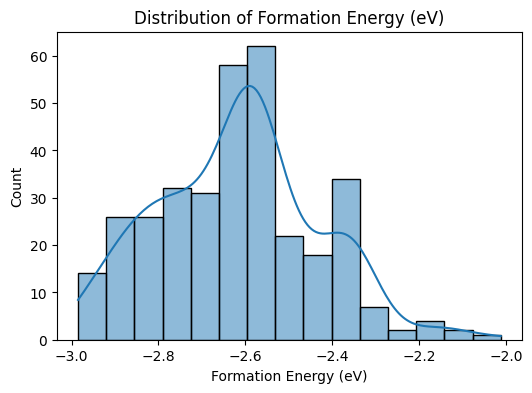

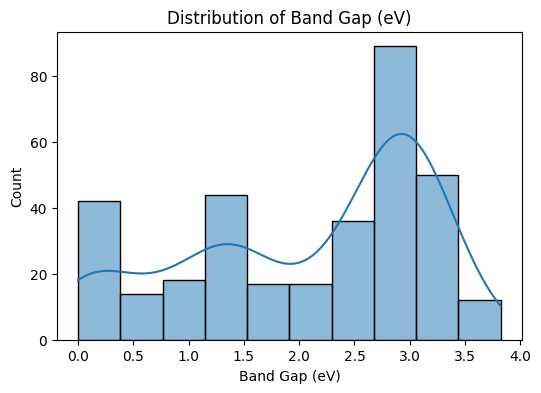

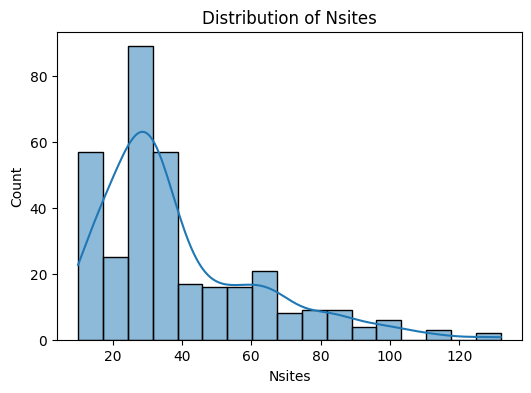

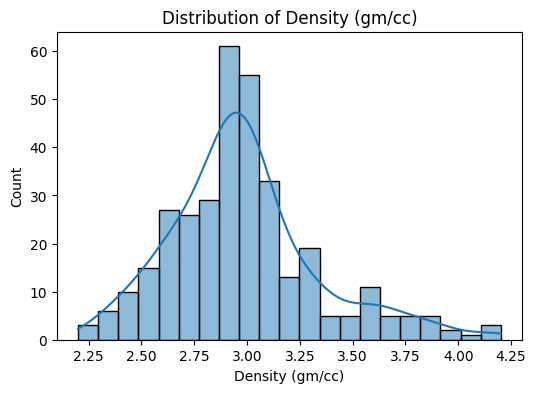

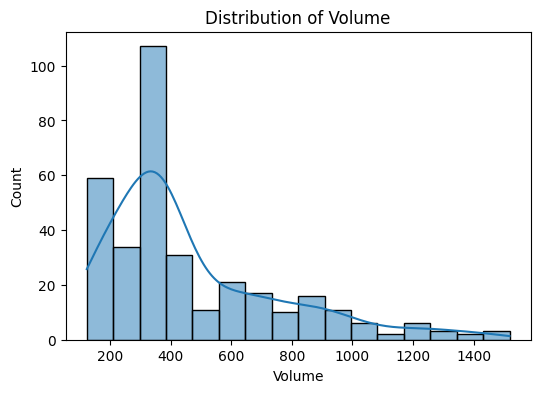

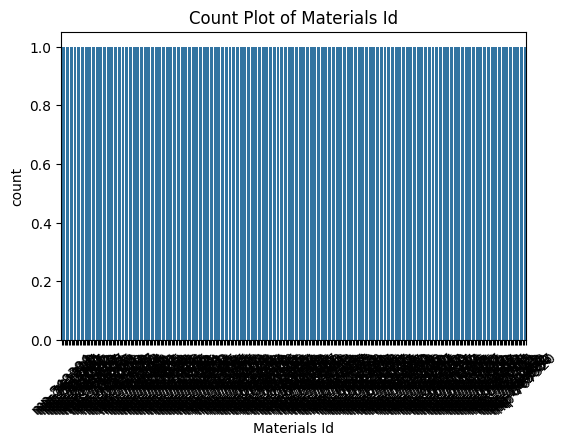

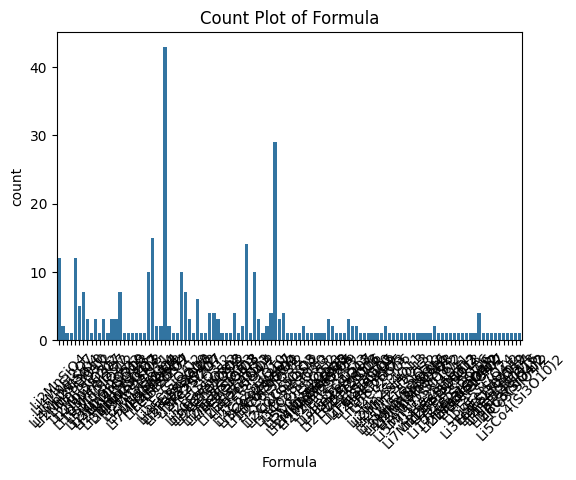

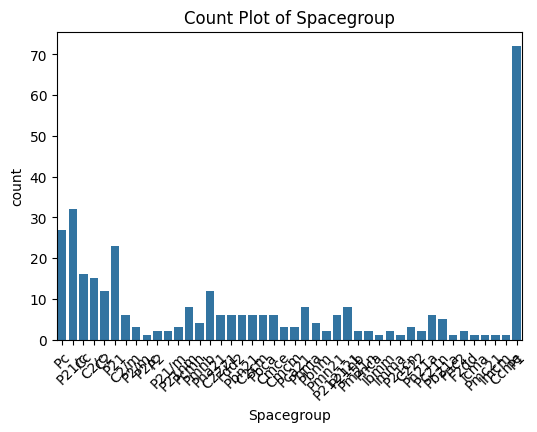

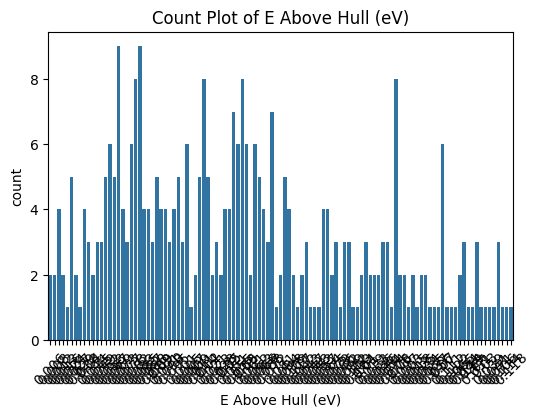

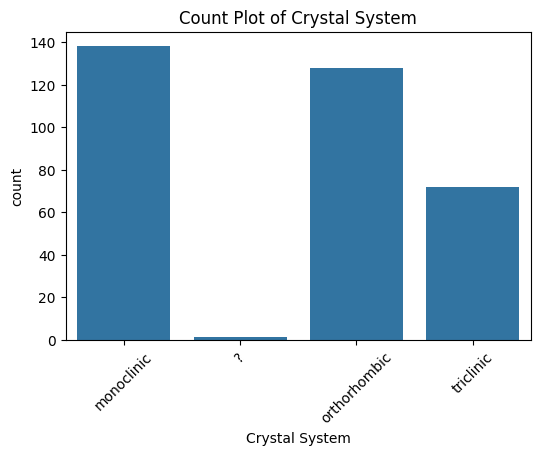

In [9]:
# 1.5 Univariate Analysis

num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include='object').columns

# Histograms for numeric columns
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# Count plots for categorical columns
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.show()


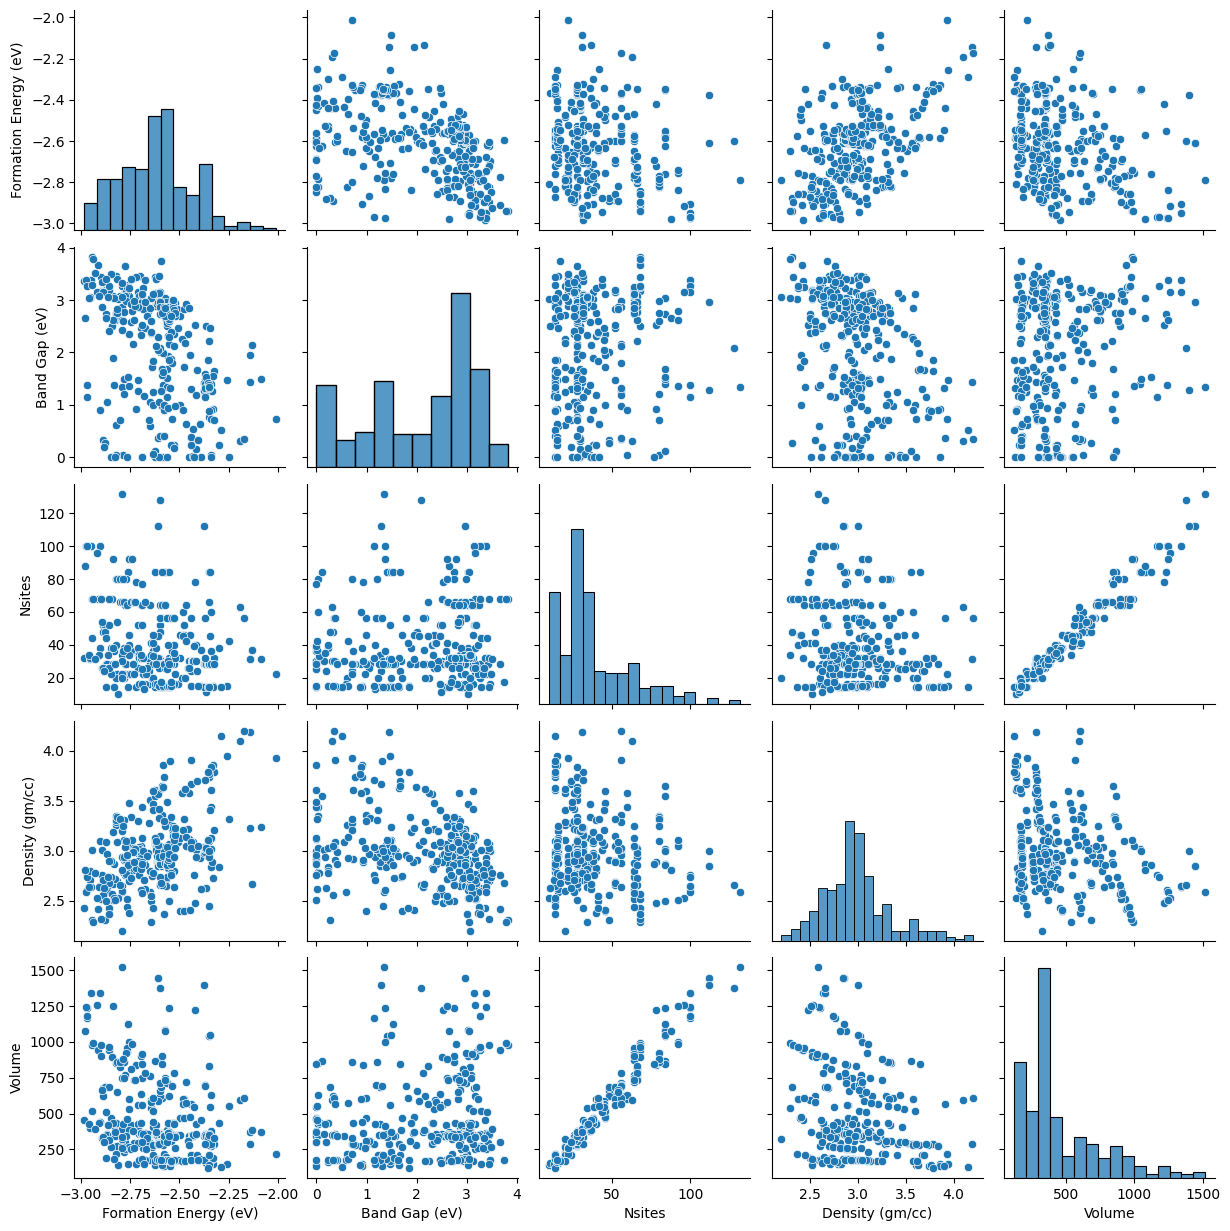

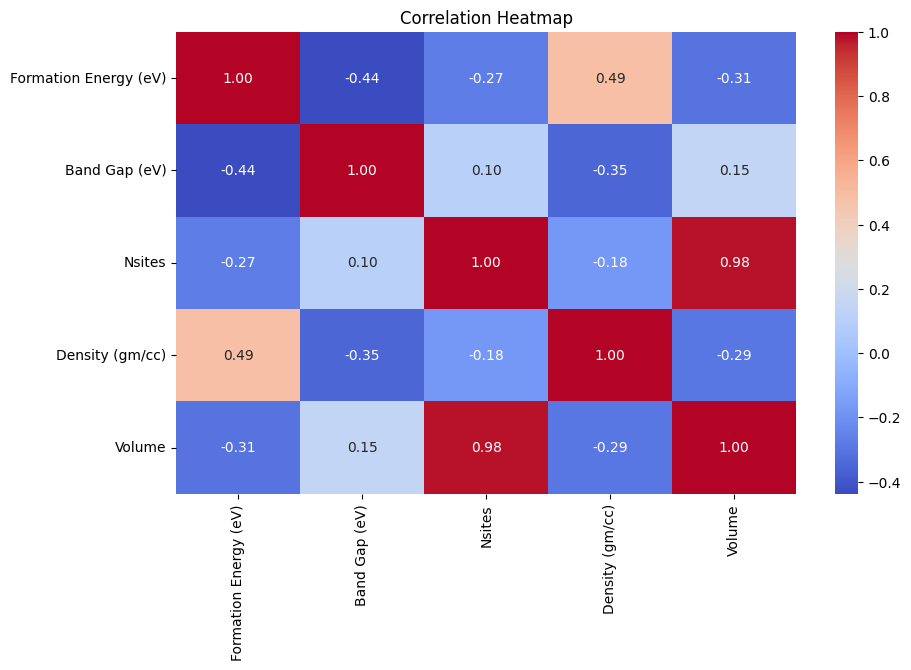

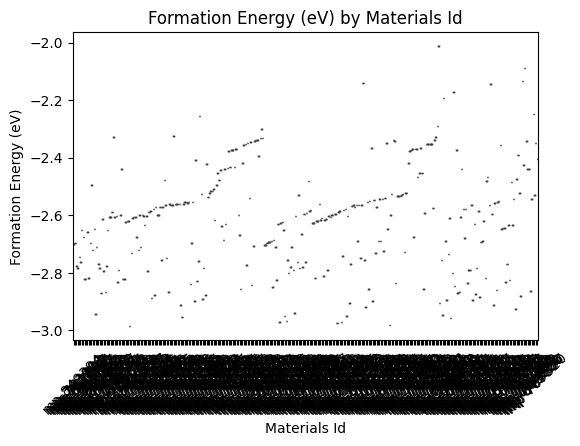

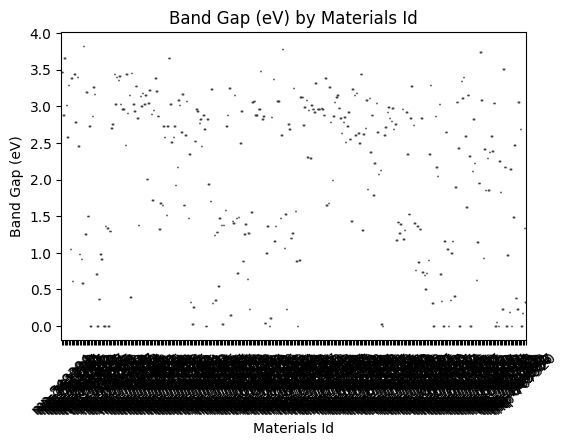

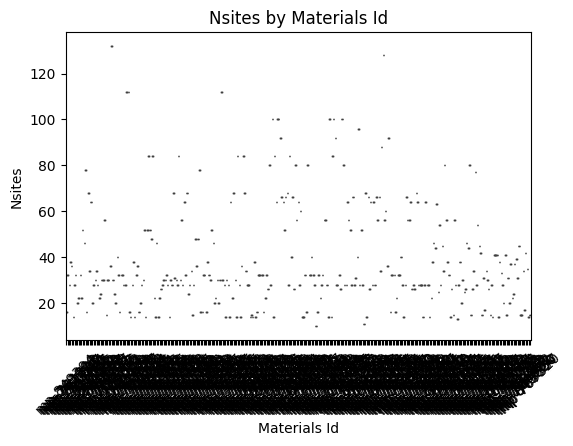

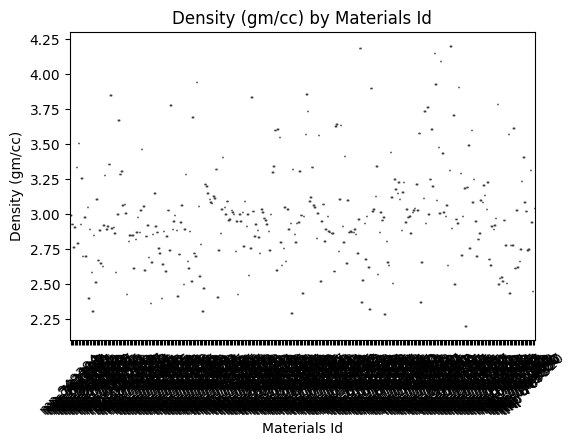

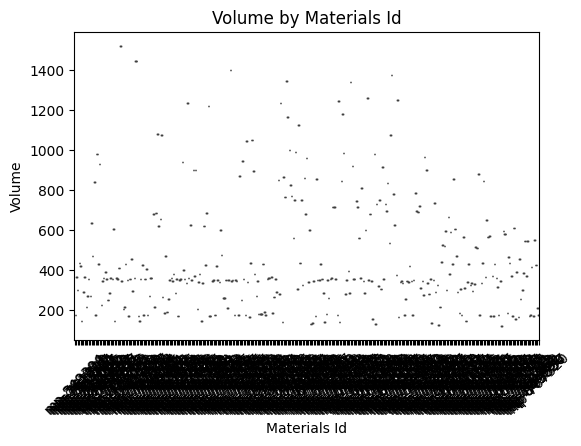

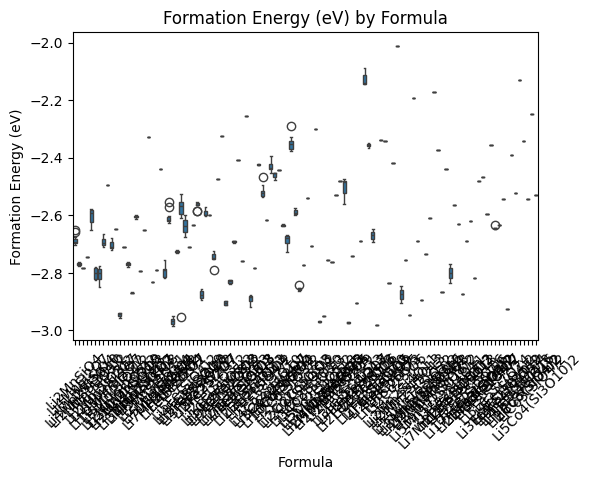

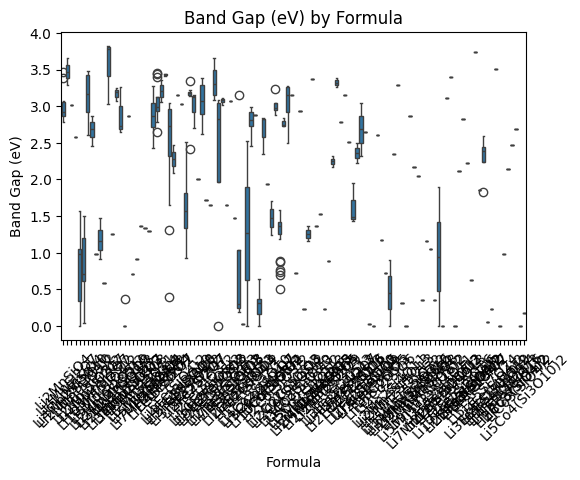

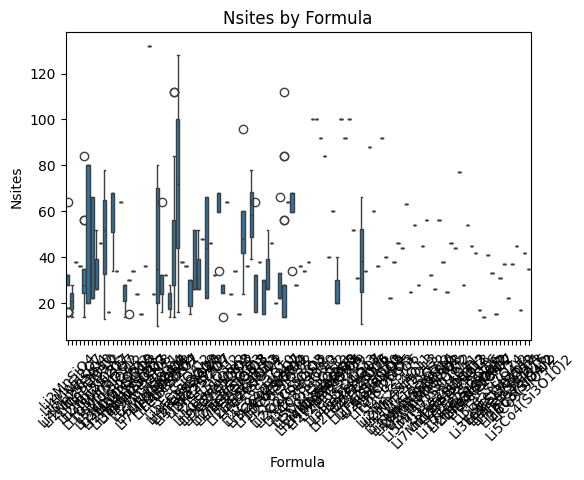

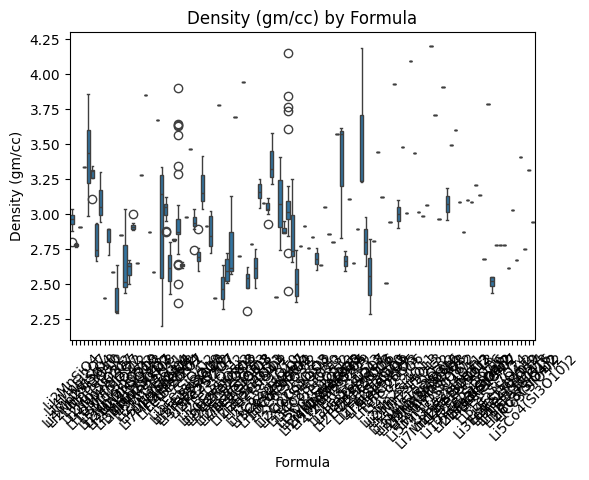

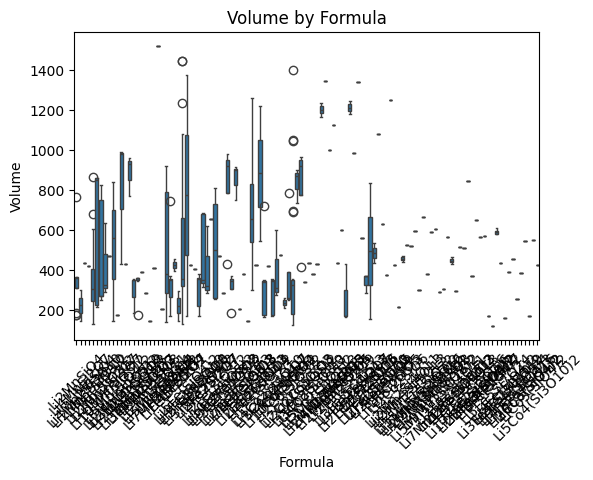

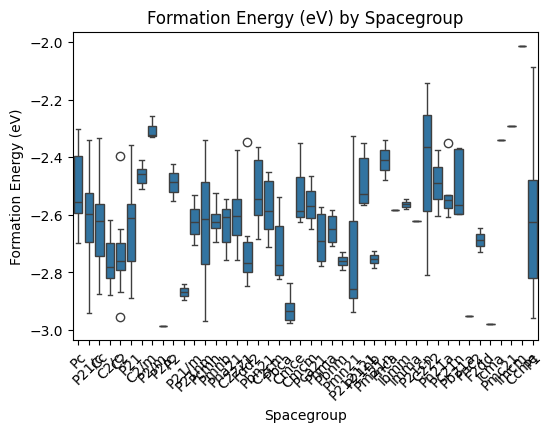

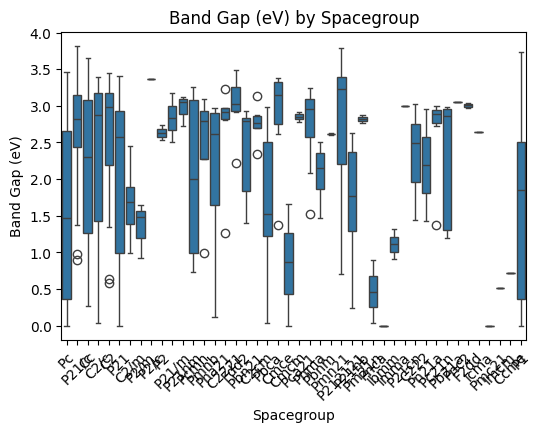

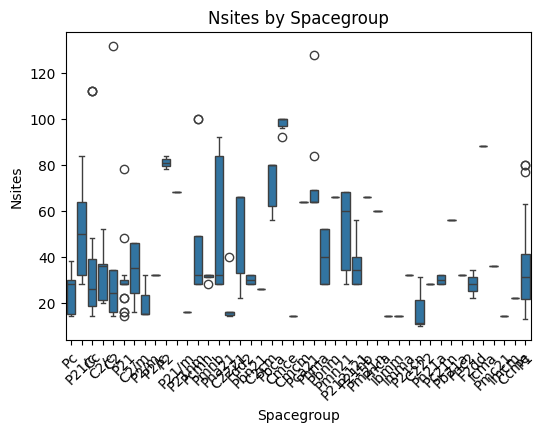

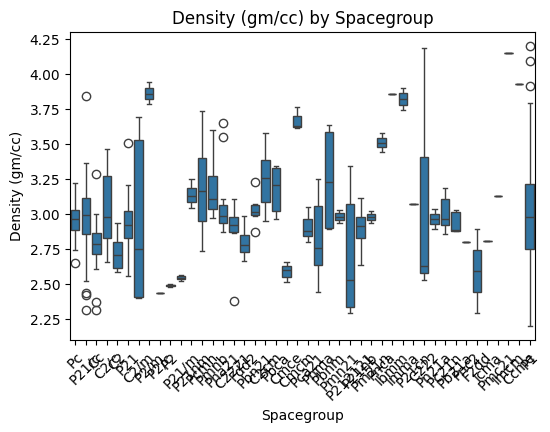

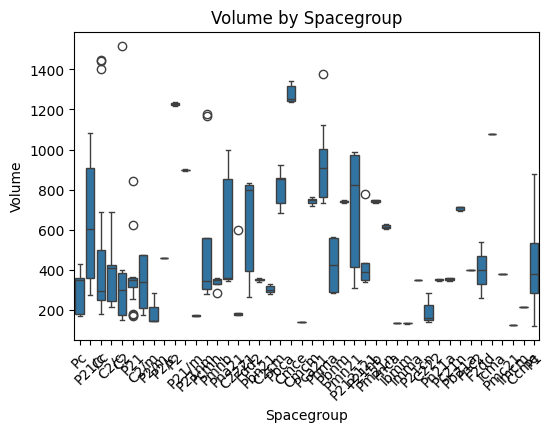

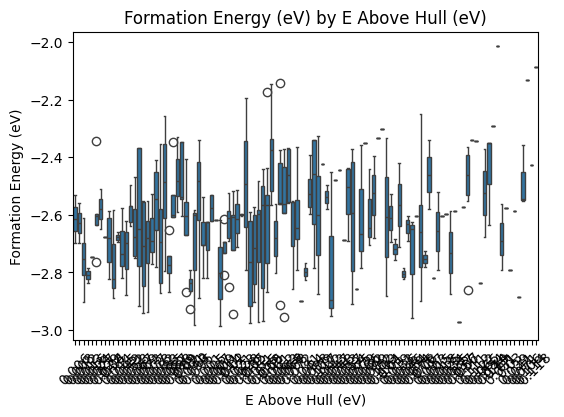

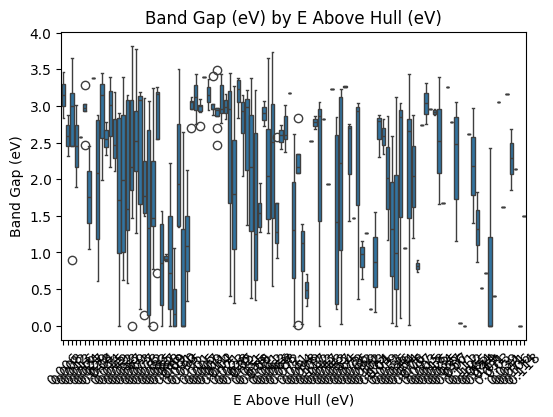

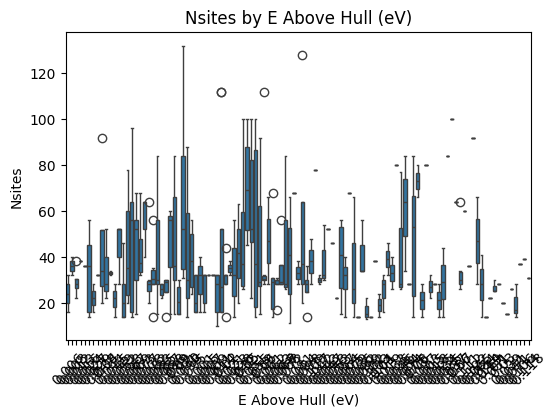

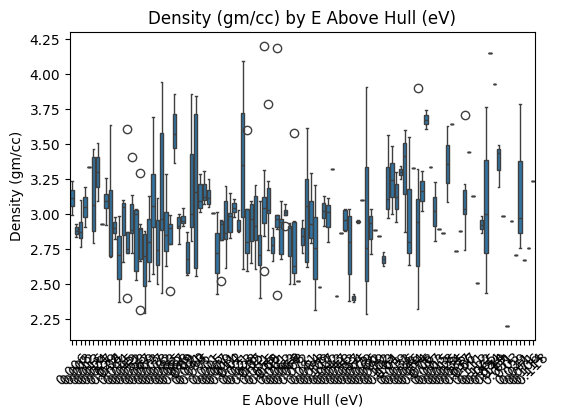

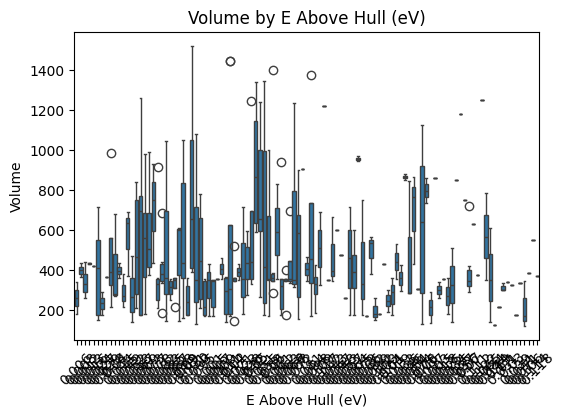

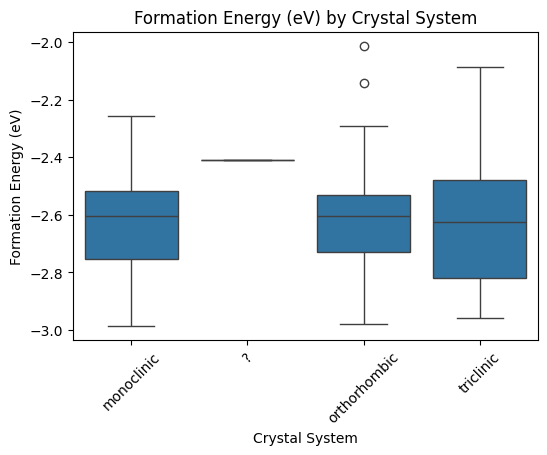

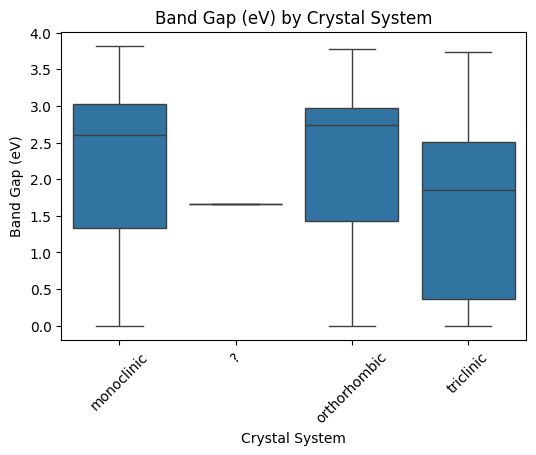

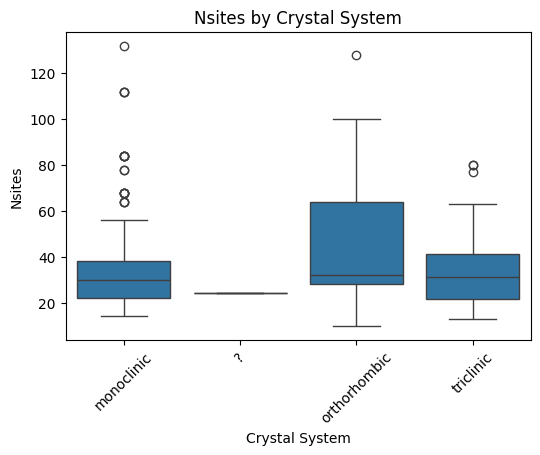

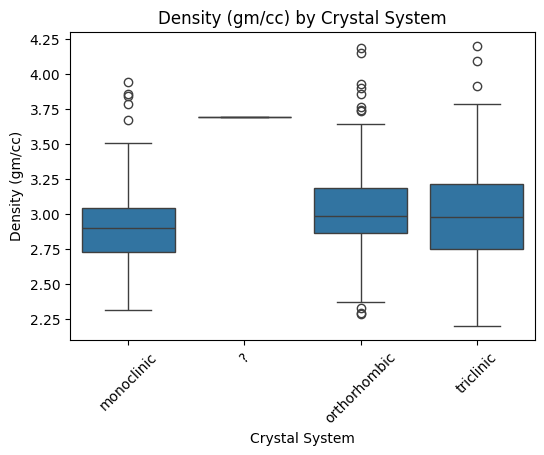

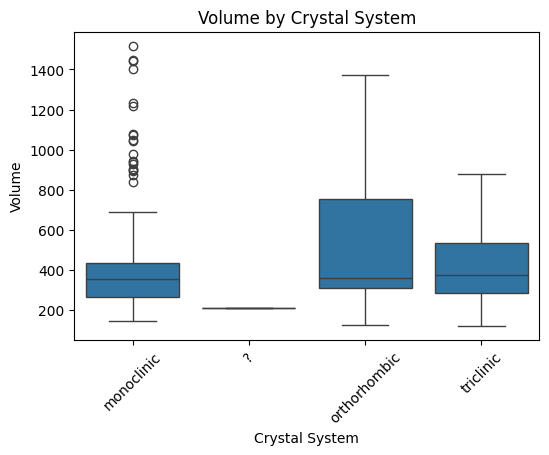

In [10]:
# 1.6 Bivariate Analysis

sns.pairplot(df[num_cols])
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Boxplots of numeric vs categorical (if categorical exists)
for col in cat_cols:
    for num in num_cols:
        plt.figure(figsize=(6,4))
        sns.boxplot(x=col, y=num, data=df)
        plt.title(f"{num} by {col}")
        plt.xticks(rotation=45)
        plt.show()

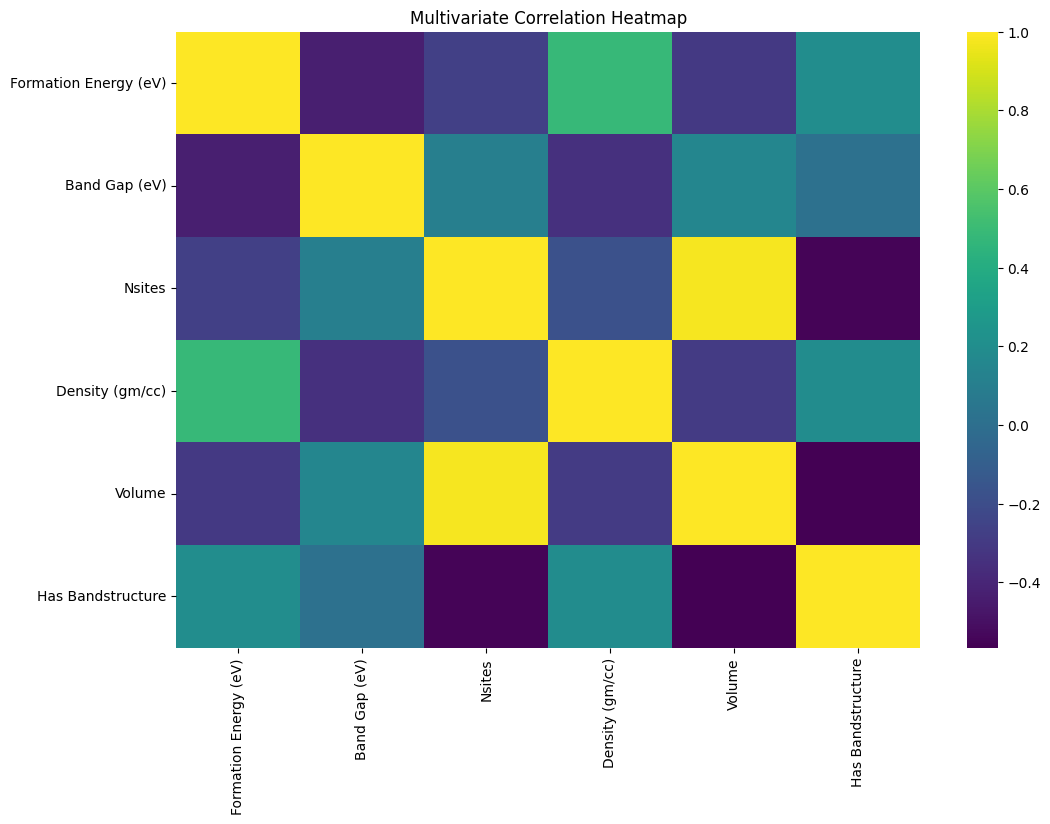

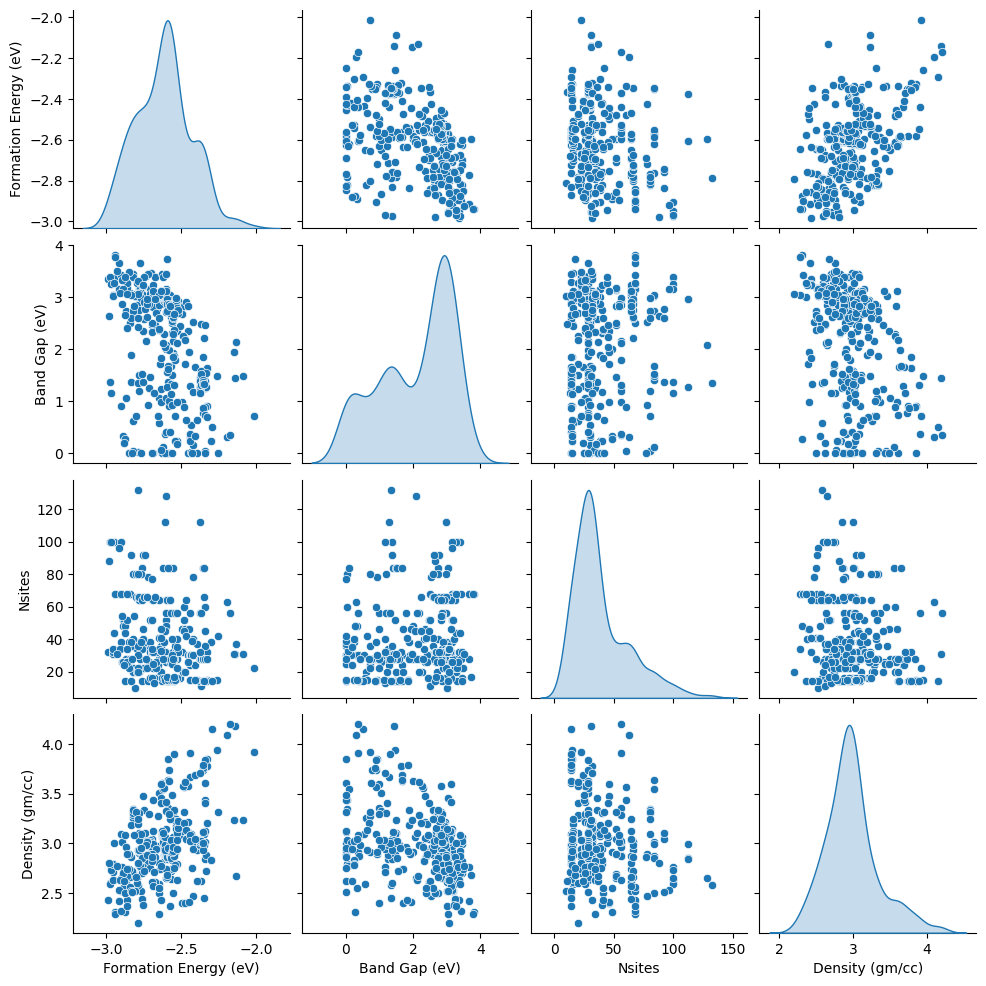

In [11]:
# 1.7 Multivariate Analysis

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), cmap="viridis", annot=False)
plt.title("Multivariate Correlation Heatmap")
plt.show()

# Pairplot for selected top variables
selected_cols = num_cols[:4]  # choose first 4 numeric features if many exist
sns.pairplot(df[selected_cols], diag_kind="kde")
plt.show()

### ***Phase-2***

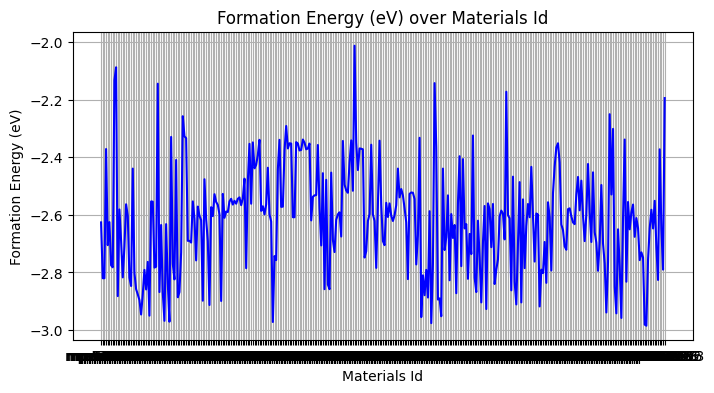

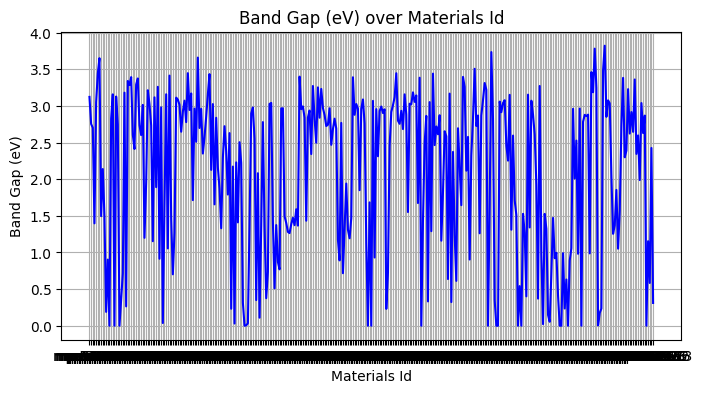

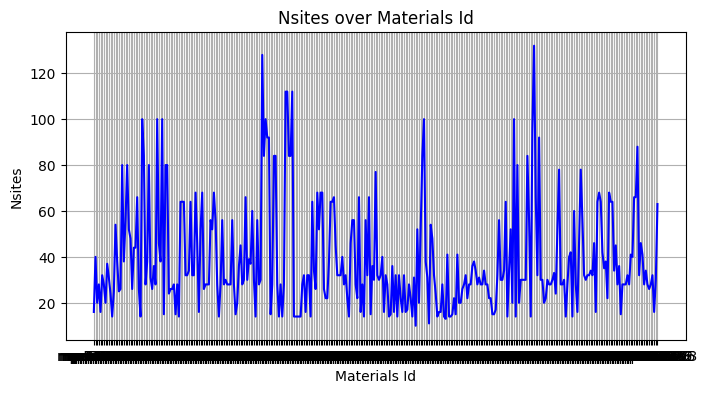

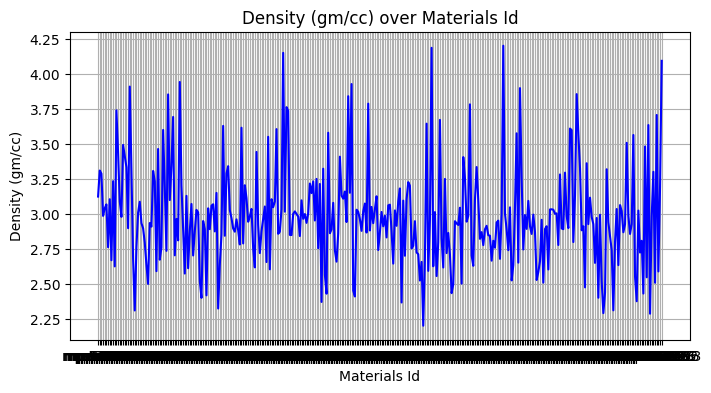

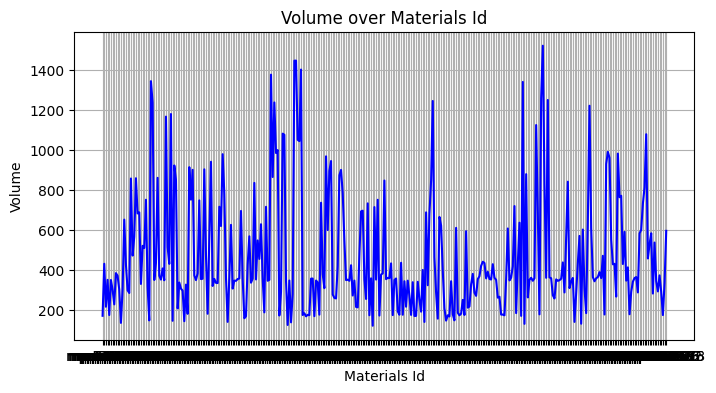

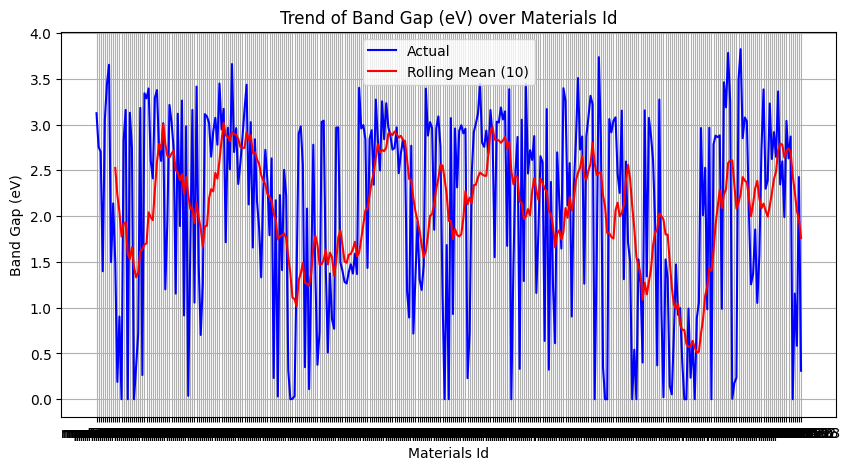

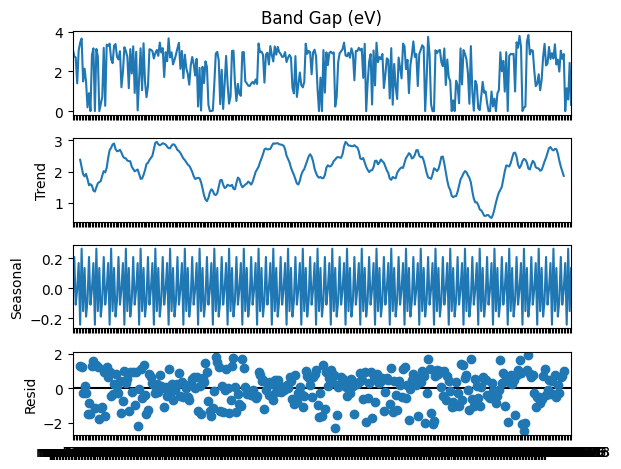

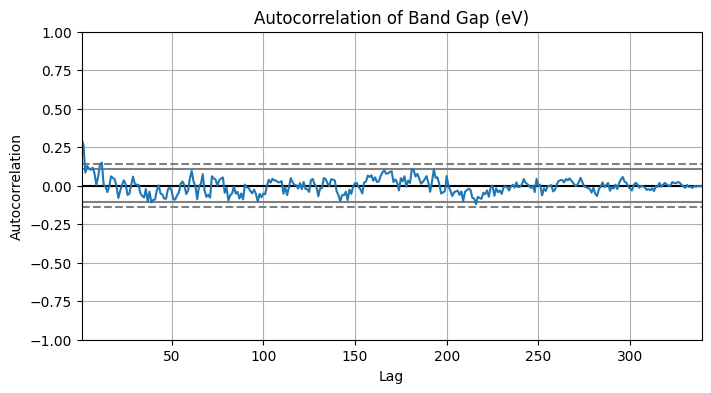

✅ Time Series Analysis Completed


In [12]:
# 2.1 Time Series Analysis

import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
time_col = 'cycle' if 'cycle' in df.columns else df.columns[0]
df = df.sort_values(by=time_col)
num_cols = df.select_dtypes(include=np.number).columns

for col in num_cols:
    if col != time_col:
        plt.figure(figsize=(8,4))
        plt.plot(df[time_col], df[col], color='blue')
        plt.title(f"{col} over {time_col}")
        plt.xlabel(time_col)
        plt.ylabel(col)
        plt.grid(True)
        plt.show()

y_col = 'Capacity' if 'Capacity' in df.columns else num_cols[1]

plt.figure(figsize=(10,5))
plt.plot(df[time_col], df[y_col], label='Actual', color='blue')
plt.plot(df[time_col], df[y_col].rolling(window=10).mean(),
         label='Rolling Mean (10)', color='red')
plt.title(f"Trend of {y_col} over {time_col}")
plt.xlabel(time_col)
plt.ylabel(y_col)
plt.legend()
plt.grid(True)
plt.show()

try:
    series = df.set_index(time_col)[y_col]
    result = seasonal_decompose(series, model='additive', period=10)
    result.plot()
    plt.show()
except Exception as e:
    print("⚠️ Seasonal decomposition skipped:", e)

plt.figure(figsize=(8,4))
autocorrelation_plot(df[y_col])
plt.title(f"Autocorrelation of {y_col}")
plt.show()

print("✅ Time Series Analysis Completed")


In [13]:
# 2.2 Statistical Summary & Elaboration

# 2.2.1 1-D Statistical Data Analysis
print("\n--- 1-D Statistical Summary ---")
print(df.describe())   # summary stats
print("\nSkewness:\n", df.skew(numeric_only=True))
print("\nKurtosis:\n", df.kurtosis(numeric_only=True))

# 2.2.2 2-D Statistical Data Analysis (correlation, covariance)
print("\n--- 2-D Statistical Analysis ---")
print("\nCovariance:\n", df.cov(numeric_only=True))
print("\nCorrelation:\n", df.corr(numeric_only=True))

# 2.2.3 Contingency table (example: between two categorical columns, if available)
cat_cols = df.select_dtypes(include='object').columns
if len(cat_cols) >= 2:
    cont_table = pd.crosstab(df[cat_cols[0]], df[cat_cols[1]])
    print("\n--- Contingency Table ---")
    print(cont_table)

# 2.2.4 n-D Statistical Data Analysis: using pandas describe with all features
print("\n--- n-D Statistical Data Analysis ---")
print(df.describe(include='all'))


--- 1-D Statistical Summary ---
       Formation Energy (eV)  Band Gap (eV)      Nsites  Density (gm/cc)  \
count             339.000000     339.000000  339.000000       339.000000   
mean               -2.616950       2.083417   38.837758         2.984003   
std                 0.183809       1.087292   23.133142         0.353968   
min                -2.985000       0.000000   10.000000         2.200000   
25%                -2.757500       1.266500   26.000000         2.760500   
50%                -2.605000       2.505500   31.000000         2.947000   
75%                -2.525500       2.968000   52.000000         3.106000   
max                -2.012000       3.823000  132.000000         4.201000   

            Volume  
count   339.000000  
mean    467.765619  
std     292.674559  
min     122.581000  
25%     286.381500  
50%     358.537000  
75%     601.696500  
max    1518.850000  

Skewness:
 Formation Energy (eV)    0.237509
Band Gap (eV)           -0.566526
Nsites       

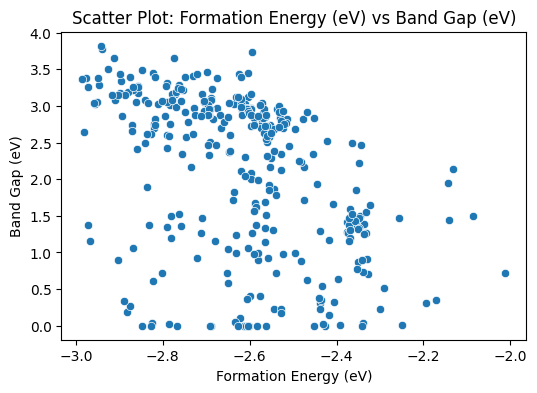

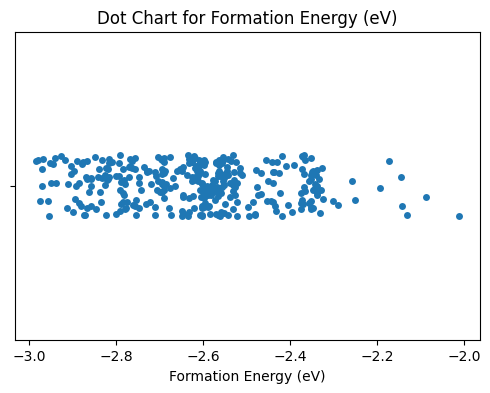

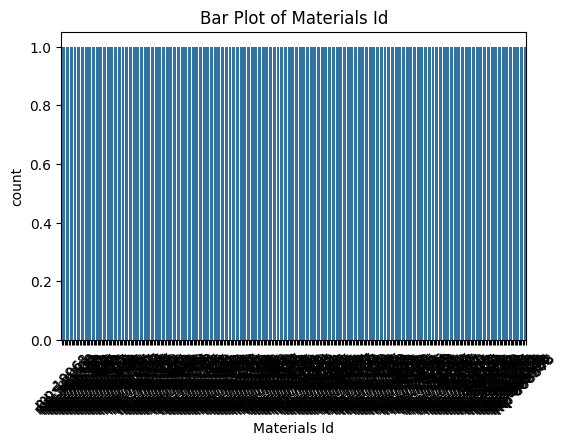

In [14]:

# 2.3 Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# 2.3.1 Scatter plots between first two numeric cols
num_cols = df.select_dtypes(include=np.number).columns
if len(num_cols) >= 2:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=num_cols[0], y=num_cols[1], data=df)
    plt.title(f"Scatter Plot: {num_cols[0]} vs {num_cols[1]}")
    plt.show()

# 2.3.2 Dot chart (stripplot)
if len(num_cols) >= 1:
    plt.figure(figsize=(6,4))
    sns.stripplot(x=df[num_cols[0]])
    plt.title(f"Dot Chart for {num_cols[0]}")
    plt.show()

# 2.3.3 Bar plot for categorical variable counts
if len(cat_cols) >= 1:
    plt.figure(figsize=(6,4))
    sns.countplot(x=cat_cols[0], data=df)
    plt.title(f"Bar Plot of {cat_cols[0]}")
    plt.xticks(rotation=45)
    plt.show()



Spectral Clustering Labels: [0 1 2]


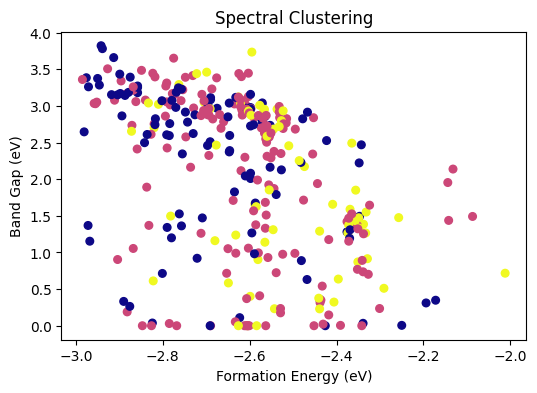


Document-like Clustering Labels: [0 1 2]


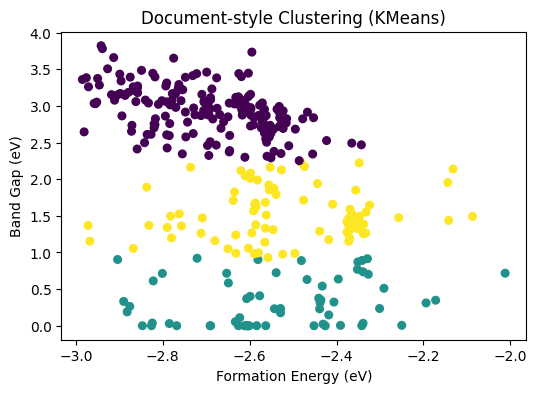


Minimum Spanning Tree (Correlation-based):
 [[ 0.         -0.43766914 -0.27077691  0.         -0.30538903]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.         -0.34936244  0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]]


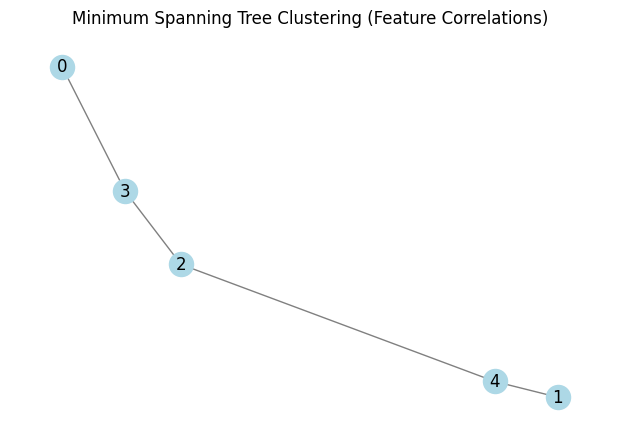


Model-based Clustering (GMM) Labels: [0 1 2]


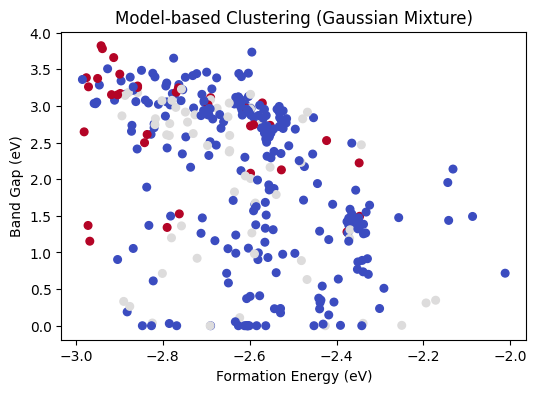


Agglomerative Clustering Labels: [0 1 2]


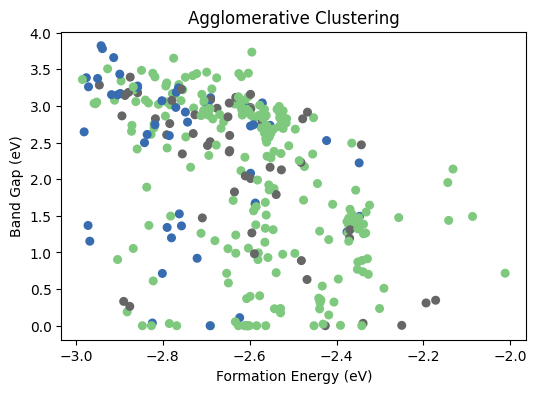

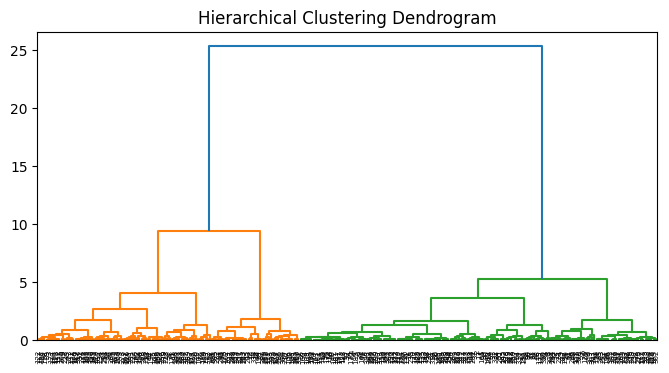

In [15]:


# 2.4 Clustering Methods
from sklearn.cluster import SpectralClustering, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from scipy.sparse.csgraph import minimum_spanning_tree

# Prepare numeric data for clustering
X = df[num_cols].dropna()
feat_x, feat_y = X.columns[0], X.columns[1]

# 2.4.1 Spectral Clustering ---
spec = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
labels_spec = spec.fit_predict(X)
print("\nSpectral Clustering Labels:", np.unique(labels_spec))
plt.figure(figsize=(6,4))
plt.scatter(X[feat_x], X[feat_y], c=labels_spec, cmap='plasma', s=30)
plt.title("Spectral Clustering")
plt.xlabel(feat_x)
plt.ylabel(feat_y)
plt.show()



# 2.4.2 Document Clustering (example using first 2 cols as pseudo-doc vectors) ---
# For real doc clustering we'd use TF-IDF, here just demo
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
labels_doc = kmeans.fit_predict(X.iloc[:, :2])
print("\nDocument-like Clustering Labels:", np.unique(labels_doc))
plt.figure(figsize=(6,4))
plt.scatter(X[feat_x], X[feat_y], c=labels_doc, cmap='viridis', s=30)
plt.title("Document-style Clustering (KMeans)")
plt.xlabel(feat_x)
plt.ylabel(feat_y)
plt.show()

# 2.4.3 Minimum Spanning Tree Clustering ---
mst = minimum_spanning_tree(np.corrcoef(X.T)).toarray()
print("\nMinimum Spanning Tree (Correlation-based):\n", mst)
import networkx as nx

# Build MST graph from correlation-based distance
corr = np.corrcoef(X.T)
dist = 1 - corr  # distance = 1 - correlation
mst = minimum_spanning_tree(dist).toarray()

# Create graph
G = nx.from_numpy_array(mst)
plt.figure(figsize=(6,4))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("Minimum Spanning Tree Clustering (Feature Correlations)")
plt.show()

# 2.4.4 Model-based Clustering (Gaussian Mixture / EM Algorithm) ---
gmm = GaussianMixture(n_components=3, random_state=42)
labels_gmm = gmm.fit_predict(X)
print("\nModel-based Clustering (GMM) Labels:", np.unique(labels_gmm))
plt.figure(figsize=(6,4))
plt.scatter(X[feat_x], X[feat_y], c=labels_gmm, cmap='coolwarm', s=30)
plt.title("Model-based Clustering (Gaussian Mixture)")
plt.xlabel(feat_x)
plt.ylabel(feat_y)
plt.show()

# 2.4.5 Hierarchical Agglomerative Clustering ---
agg = AgglomerativeClustering(n_clusters=3)
labels_agg = agg.fit_predict(X)
print("\nAgglomerative Clustering Labels:", np.unique(labels_agg))
# --- Hierarchical Agglomerative Clustering Visualization ---
plt.figure(figsize=(6,4))
plt.scatter(X[feat_x], X[feat_y], c=labels_agg, cmap='Accent', s=30)
plt.title("Agglomerative Clustering")
plt.xlabel(feat_x)
plt.ylabel(feat_y)
plt.show()

# --- Dendrogram for Hierarchical Clustering ---
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(X[[feat_x, feat_y]], method='ward')
plt.figure(figsize=(8,4))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()


DBSCAN Clustering Labels: [-1]
DBSCAN found 0 clusters and 339 noise points


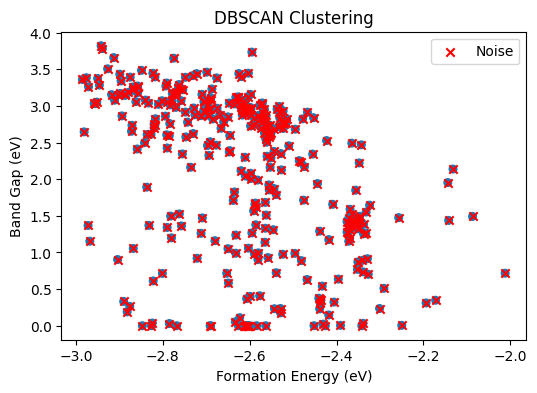

In [17]:
# 2.4.6 DBSCAN Clustering ---
num_cols = df.select_dtypes(include=np.number).columns
X = df[num_cols].dropna()

from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_db = dbscan.fit_predict(X)

print("\nDBSCAN Clustering Labels:", np.unique(labels_db))

n_clusters_db = len(set(labels_db)) - (1 if -1 in labels_db else 0)
n_noise_db = list(labels_db).count(-1)
print(f"DBSCAN found {n_clusters_db} clusters and {n_noise_db} noise points")

feat_x, feat_y = X.columns[0], X.columns[1]
plt.figure(figsize=(6,4))
plt.scatter(X[feat_x], X[feat_y], c=labels_db, cmap='tab10', s=30)

noise_mask = (labels_db == -1)
plt.scatter(X[feat_x][noise_mask], X[feat_y][noise_mask], color='red', marker='x', label='Noise')

plt.title("DBSCAN Clustering")
plt.xlabel(feat_x)
plt.ylabel(feat_y)
plt.legend()
plt.show()
